# Parse ADF File

In [1]:
from magellantools import ARCDR
import pprint
import matplotlib.pyplot as plt

## Download example ADF file and label

In [2]:
!wget -nc https://pds-geosciences.wustl.edu/mgn/mgn-v-rdrs-5-cdr-alt-rad-v1/mg_2008/17611780/adf01761.lbl
!wget -nc https://pds-geosciences.wustl.edu/mgn/mgn-v-rdrs-5-cdr-alt-rad-v1/mg_2008/17611780/adf01761.1

--2023-05-12 12:23:51--  https://pds-geosciences.wustl.edu/mgn/mgn-v-rdrs-5-cdr-alt-rad-v1/mg_2008/17611780/adf01761.lbl
Resolving pds-geosciences.wustl.edu (pds-geosciences.wustl.edu)... 128.252.144.141
Connecting to pds-geosciences.wustl.edu (pds-geosciences.wustl.edu)|128.252.144.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2800 (2.7K) [text/plain]
Saving to: ‘adf01761.lbl’

adf01761.lbl        100%[===================>]   2.73K  --.-KB/s    in 0s      

2023-05-12 12:23:51 (514 MB/s) - ‘adf01761.lbl’ saved [2800/2800]

--2023-05-12 12:23:51--  https://pds-geosciences.wustl.edu/mgn/mgn-v-rdrs-5-cdr-alt-rad-v1/mg_2008/17611780/adf01761.1
Resolving pds-geosciences.wustl.edu (pds-geosciences.wustl.edu)... 128.252.144.141
Connecting to pds-geosciences.wustl.edu (pds-geosciences.wustl.edu)|128.252.144.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1657500 (1.6M) [application/octet-stream]
Saving to: ‘adf01761.1’

adf01761.1 

## Open with magellantools

In [3]:
hdr, mask, adf = ARCDR.readARCDR("./adf01761.lbl")

# Apply nodata mask
adf = adf[mask]

## Examine output

### Header fields

In [4]:
pprint.pprint(hdr)

{'CCSD1R00000300000074DELIMITER': 'SMARKER',
 'CCSD1Z00000100000480NJPL1K00KL0000000366PRODUCT_FILE_NAME': 'ADF01761.1',
 'DATA_FORMAT_TYPE': 'VAX ',
 'HARDWARE_VERSION_ID': '01',
 'MISSION_ID': '4',
 'MISSION_NAME': 'MAGELLAN',
 'NAV_UNIQUE_ID': '"ID ',
 'ORBIT_NUMBER': '01761',
 'PROCESS_TIME': '1991-08-30T08:25:58.000',
 'PRODUCT_NAME': 'ALTIMETRY_DATA_RECORD',
 'PRODUCT_TYPE': 'ALTIMETRY_FILE',
 'SOFTWARE_VERSION_ID': '02',
 'SPACECRAFT_ID': '18',
 'SPACECRAFT_NAME': 'MAGELLAN',
 'TEMPLATE_VERSION_NUMBER': '02',
 'TYPE': 'NJPL1I000177',
 'UPLOAD_ID': 'M1079Q'}


### Data file fields

In [5]:
pprint.pprint(adf.dtype.names)

('SFDU_LABEL_AND_LENGTH',
 'FOOTPRINT_NUMBER',
 'ALT_FLAG_GROUP',
 'ALT_FLAG2_GROUP',
 'ALTIMETRY_FOOTPRINT_TDB_TIME',
 'ALT_SPACECRAFT_POSITION_VECTOR',
 'ALT_SPACECRAFT_VELOCITY_VECTOR',
 'ALT_FOOTPRINT_LONGITUDE',
 'ALT_FOOTPRINT_LATITUDE',
 'ALT_ALONG_TRACK_FOOTPRINT_SIZE',
 'ALT_CROSS_TRACK_FOOTPRINT_SIZE',
 'RECEIVER_NOISE_CALIBRATION',
 'UNCORRECTED_DISTANCE_TO_NADIR',
 'ATMOS_CORRECTION_TO_DISTANCE',
 'DERIVED_PLANETARY_RADIUS',
 'RADAR_DERIVED_SURF_ROUGHNESS',
 'DERIVED_FRESNEL_REFLECTIVITY',
 'DERIVED_FRESNEL_REFLECT_CORR',
 'FORMAL_ERRORS_GROUP',
 'FORMAL_CORRELATIONS_GROUP',
 'EPHEMERIS_RADIUS_CORRECTION',
 'EPHEMERIS_LONGITUDE_CORRECTION',
 'EPHEMERIS_LATITUDE_CORRECTION',
 'ALT_PARTIALS_GROUP',
 'NON_RANGE_SHARP_FIT',
 'SCALING_FACTOR',
 'NON_RANGE_SHARP_LOOKS',
 'NON_RANGE_PROF_CORRS_INDEX',
 'NON_RANGE_SHARP_ECHO_PROF',
 'BEST_NON_RANGE_SHARP_MODEL_TPT',
 'RANGE_SHARP_FIT',
 'RANGE_SHARP_SCALING_FACTOR',
 'RANGE_SHARP_LOOKS',
 'RANGE_SHARP_PROF_CORRS_INDEX',
 'RANGE_SHA

### Plot first non range-sharpened echo profile in file

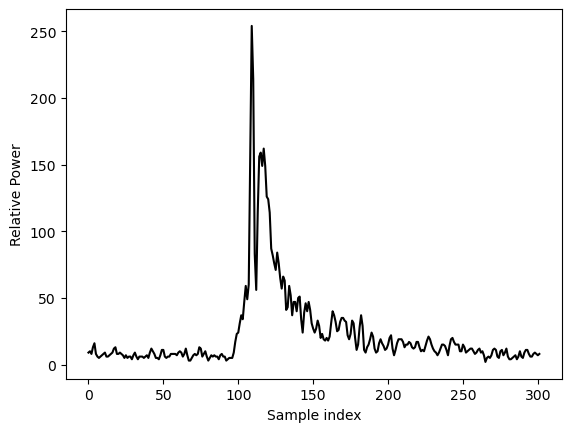

In [6]:
plt.plot(adf["NON_RANGE_SHARP_ECHO_PROF"][0], 'k')
plt.xlabel("Sample index")
plt.ylabel("Relative Power")
plt.show()

### Plot ground track

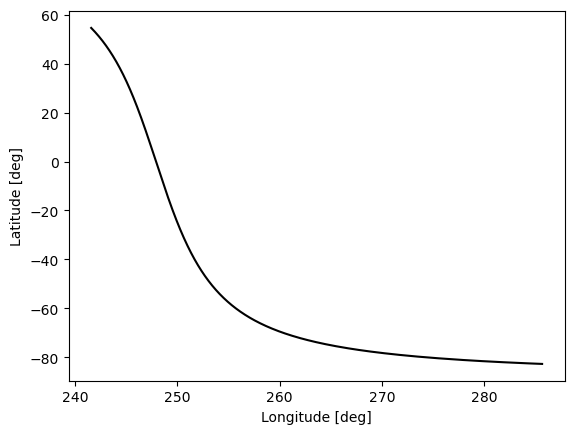

In [7]:
plt.plot(adf["ALT_FOOTPRINT_LONGITUDE"], adf["ALT_FOOTPRINT_LATITUDE"] , 'k')
plt.xlabel("Longitude [deg]")
plt.ylabel("Latitude [deg]")
plt.show()